In [94]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import janitor

In [95]:
sns.set_theme(style='whitegrid', context='notebook')

In [96]:
housing_raw_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", header=None, sep="\s+")

In [97]:
# These are indicated in repository.
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

## Attribute Information:

1. **CRIM**: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;per capita crime rate by town
2. **ZN**: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;proportion of residential land zoned for lots over 25,000 sq.ft.
3. **INDUS**: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;proportion of non-retail business acres per town
4. **CHAS**: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. **NOX**: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;nitric oxides concentration (parts per 10 million)
6. **RM**: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;average number of rooms per dwelling
7. **AGE**: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;proportion of owner-occupied units built prior to 1940
8. **DIS**: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;weighted distances to five Boston employment centres
9. **RAD**: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;index of accessibility to radial highways
10. **TAX**: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;full-value property-tax rate per $10,000
11. **PTRATIO**: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;pupil-teacher ratio by town
12. **B**: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. **LSTAT**: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;lower status of the population
14. **MEDV**: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Median value of owner-occupied homes in $1000's



In [98]:
housing_raw_df.columns = names

In [99]:
housing_raw_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [100]:
housing_raw_df.isna().sum().sum()

0

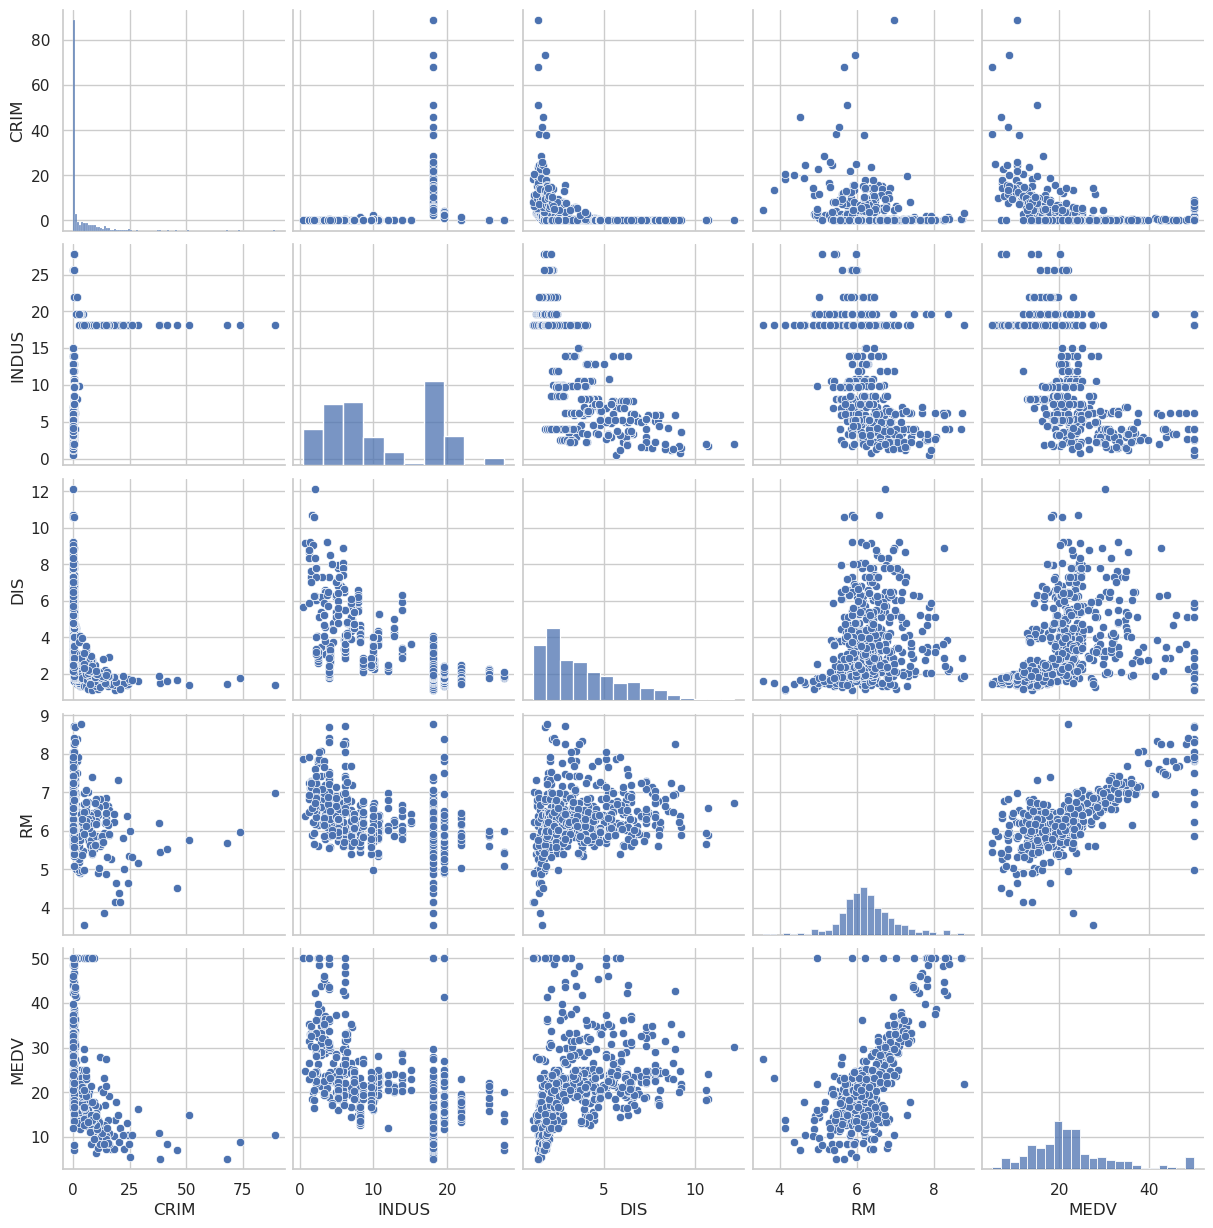

In [101]:
# Most important columns
cols = ["CRIM", "INDUS", "DIS", "RM", "MEDV"]

sns.pairplot(
    data=housing_raw_df[cols],
    height=2.5
)
plt.show()

In [102]:
np.corrcoef(housing_raw_df[cols].values.T)

array([[ 1.        ,  0.40658341, -0.37967009, -0.2192467 , -0.38830461],
       [ 0.40658341,  1.        , -0.70802699, -0.39167585, -0.48372516],
       [-0.37967009, -0.70802699,  1.        ,  0.20524621,  0.24992873],
       [-0.2192467 , -0.39167585,  0.20524621,  1.        ,  0.69535995],
       [-0.38830461, -0.48372516,  0.24992873,  0.69535995,  1.        ]])

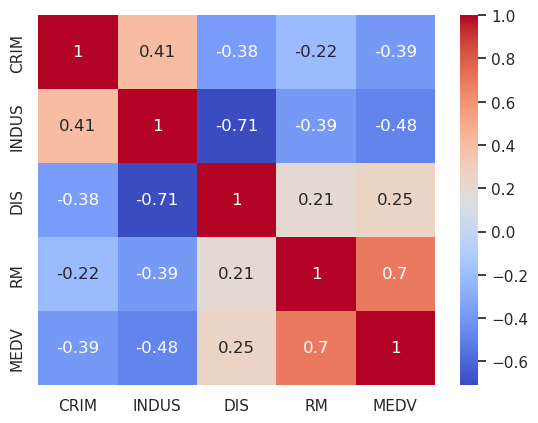

In [103]:
sns.heatmap(
    data=housing_raw_df[cols].corr(),
    cbar=True,
    cmap="coolwarm",
    annot=True,
    yticklabels=cols,
    xticklabels=cols
)
plt.show()

## First LinearRegression with `scikit-learn`

In [104]:
from sklearn.preprocessing import StandardScaler # Scaling of data, allow my model fits better, even when there's heavy outliers
from sklearn.linear_model import LinearRegression

In [119]:
x = housing_raw_df['RM'].values.reshape(-1,1)
y = housing_raw_df['MEDV'].values.reshape(-1,1)

In [120]:
sc_x = StandardScaler()
sc_y = StandardScaler()

In [121]:
x_std = sc_x.fit_transform(x)
y_std = sc_y.fit_transform(y)

In [122]:
slr = LinearRegression()
slr.fit(x_std, y_std)

LinearRegression()

In [123]:
print(y_std)

[[ 0.15968566]
 [-0.10152429]
 [ 1.32424667]
 [ 1.18275795]
 [ 1.48750288]
 [ 0.6712218 ]
 [ 0.03996443]
 [ 0.49708184]
 [-0.65659542]
 [-0.39538548]
 [-0.81985164]
 [-0.39538548]
 [-0.09064054]
 [-0.23212926]
 [-0.47157171]
 [-0.286548  ]
 [ 0.06173193]
 [-0.54775795]
 [-0.25389676]
 [-0.47157171]
 [-0.97222411]
 [-0.31919924]
 [-0.79808414]
 [-0.87427038]
 [-0.75454915]
 [-0.93957286]
 [-0.64571167]
 [-0.84161913]
 [-0.44980422]
 [-0.16682677]
 [-1.07017784]
 [-0.87427038]
 [-1.0157591 ]
 [-1.02664285]
 [-0.98310786]
 [-0.39538548]
 [-0.27566425]
 [-0.16682677]
 [ 0.23587189]
 [ 0.89978051]
 [ 1.34601416]
 [ 0.4426631 ]
 [ 0.30117438]
 [ 0.23587189]
 [-0.14505928]
 [-0.35185049]
 [-0.27566425]
 [-0.64571167]
 [-0.88515413]
 [-0.34096674]
 [-0.30831549]
 [-0.22124551]
 [ 0.26852314]
 [ 0.09438317]
 [-0.39538548]
 [ 1.4004329 ]
 [ 0.23587189]
 [ 0.98685049]
 [ 0.08349942]
 [-0.31919924]
 [-0.41715297]
 [-0.71101416]
 [-0.0362218 ]
 [ 0.26852314]
 [ 1.13922296]
 [ 0.10526692]
 [-0.34096

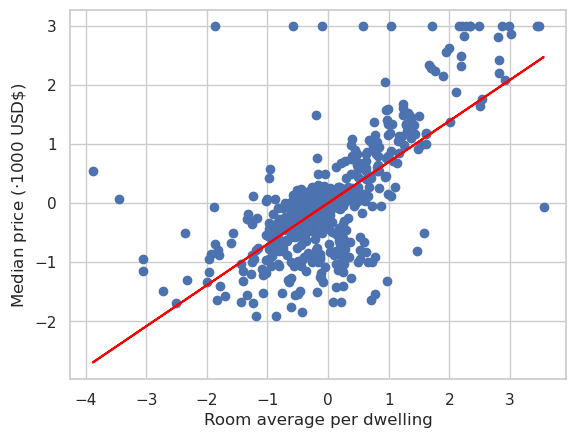

In [135]:
plt.scatter(x_std,y_std)
plt.plot(x_std, slr.predict(x_std), color="red")
plt.ylabel(r"Median price ($\cdot 1000$ USD\$)")
plt.xlabel("Room average per dwelling")
plt.show()

In [137]:
no_rooms = 5
no_rooms_std = sc_x.transform(np.array([no_rooms]).reshape(-1,1))

In [144]:
print(f"Price of house with 5 rooms in Boston is: {sc_y.inverse_transform(slr.predict(no_rooms_std))[0][0]*1000:.2f} USD")


Price of house with 5 rooms in Boston is: 10839.92 USD


Why data has to be scaled? - We are missing for this answer
## Task: Make a brief review about linear regression and when to use it!